# Watch a temperature : scan temperature *v* time

*APS Training for Bluesky Data Acquisition*.

**Objective**

Measure the temperature for a short period and compute basics measures of the collected readings.

## Start the `instrument` package

In [1]:
from instrument.collection import *

I Tue-11:37:39 - /home/prjemian/Documents/projects/BCDA-APS/epics-bluesky-vm/instrument/iocs/check_iocs.py


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/prjemian/Documents/projects/BCDA-APS/epics-bluesky-vm/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Tue-11:37:39 - EPICS IOCs ready...
I Tue-11:37:39 - #### Bluesky Framework ####
I Tue-11:37:39 - /home/prjemian/Documents/projects/BCDA-APS/epics-bluesky-vm/instrument/framework/check_python.py
I Tue-11:37:39 - /home/prjemian/Documents/projects/BCDA-APS/epics-bluesky-vm/instrument/framework/check_bluesky.py
I Tue-11:37:40 - /home/prjemian/Documents/projects/BCDA-APS/epics-bluesky-vm/instrument/framework/initialize.py
I Tue-11:37:40 - using databroker catalog 'training'
I Tue-11:37:40 - /home/prjemian/Documents/projects/BCDA-APS/epics-bluesky-vm/instrument/framework/metadata.py
I Tue-11:37:40 - #### Devices ####
I Tue-11:37:40 - /home/prjemian/Documents/projects/BCDA-APS/epics-bluesky-vm/instrument/devices/area_detector.py
I Tue-11:37:40 - /home/prjemian/Documents/projects/BCDA-APS/epics-bluesky-vm/instrument/devices/calculation_records.py
I Tue-11:37:42 - /home/prjemian/Documents/projects/BCDA-APS/epics-bluesky-vm/instrument/devices/ioc_stats.py
I Tue-11:37:42 - /home/prjemian/Docume

Add the name of this notebook as metadata to every run.  This is done by adding to the RunEngine's metadata dictionary (`RE.md`), content that will be added to the *start* document of every run.  The metadata is useful documentation about a run and can be used for several purposes, such as to record a general condition (such as the name of this notebook) or to identify these runs from a database search.

In [2]:
RE.md["notebook"] = "watch_temperature"

## Describe

Note the initial settings of the `temperature` (controller).  It's actually an EPICS *swait* record that simulates a temperature sensor and controller.  It has a setpoint, a readback, and a few other support attributes as shown.  A Random noise level is part of the simulation.  We'll compute that noise level from the standard deviation of the measurements.

In [3]:
listdevice(temperature)

==================== ===== ==========================
name                 value timestamp                 
==================== ===== ==========================
temperature_setpoint 25.0  2021-04-13 11:37:45.747165
temperature          25.0  2021-04-13 11:37:45.748654
==================== ===== ==========================



## Read

The `temperature` setpoint can be used just as if it was a motor (it is based on the [`ophyd.PVPositioner`](https://blueskyproject.io/ophyd/positioners.html?highlight=pvpositioner#pvpositioner).  The simulator includes both noise and a limited ramp rate.  A move of more than a couple degrees will take a measureable time, simulating a physical system.

Get the current temperature.

In [4]:
print(f"{temperature.position = }")

temperature.position = 25.0


Use the `.read()` method to get the data

In [5]:
temperature.read()

OrderedDict([('temperature_setpoint',
              {'value': 25.0, 'timestamp': 1618331865.747165}),
             ('temperature', {'value': 25.0, 'timestamp': 1618331865.748654})])

## Move

Change the temperature by 10 degrees (and measure how long this took).  Use the *relative* move magic command: `%movr`

In [6]:
import time
t0 = time.time()
%movr temperature 10
print(f"{time.time()-t0 = :.3f} s")
print(f"{temperature.position = }")


temperature:  19%|████▋                    | 1.872/10.0 [00:01<00:05,  1.42C/s]
temperature:  41%|██████████▏              | 4.059/10.0 [00:03<00:04,  1.22C/s]
temperature:  60%|███████████████          | 6.033/10.0 [00:05<00:03,  1.13C/s]
temperature:  80%|████████████████████     | 8.011/10.0 [00:07<00:01,  1.09C/s]
temperature: 100%|██████████████████████████| 10.0/10.0 [00:09<00:00,  1.07C/s]
temperature [In progress. No progress bar available.]                          
                                                                               
time.time()-t0 = 9.348 s
temperature.position = 35.240901808194096


## Count
Use the bluesky RunEngine, `RE`, and a standard plan, `bp.count()`, to count the temperature.

In [7]:
RE(bp.count([temperature]))



Transient Scan ID: 46     Time: 2021-04-13 11:37:55
Persistent Unique Scan ID: '1f7de125-d1a1-410d-8cef-cd7c6d2e7f60'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 11:37:55.4 |             35.00000 |    35.24090 |
+-----------+------------+----------------------+-------------+
generator count ['1f7de125'] (scan num: 46)


('1f7de125-d1a1-410d-8cef-cd7c6d2e7f60',)

Take ten readings by adding the `num=10` keyword argument (a.k.a. *kwarg*).



Transient Scan ID: 47     Time: 2021-04-13 11:37:55
Persistent Unique Scan ID: '586a30d3-ae48-4ff3-bf72-4cc3d4f03675'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 11:37:55.9 |             35.00000 |    35.24090 |
|         2 | 11:37:56.0 |             35.00000 |    35.24090 |
|         3 | 11:37:56.1 |             35.00000 |    35.24090 |
|         4 | 11:37:56.2 |             35.00000 |    35.24090 |
|         5 | 11:37:56.2 |             35.00000 |    35.24090 |
|         6 | 11:37:56.3 |             35.00000 |    35.24090 |
|         7 | 11:37:56.4 |             35.00000 |    35.24090 |
|         8 | 11:37:56.4 |             35.00000 |    35.24090 |
|         9 | 11:37:56.5 |             35.00000 |    35.24090 |
|        10 | 11:37:56.6 |             35.00000 |    35.24090 |
+--

('586a30d3-ae48-4ff3-bf72-4cc3d4f03675',)

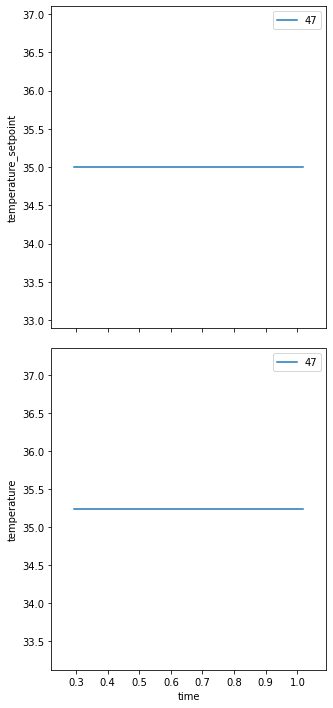

In [8]:
RE(bp.count([temperature], num=10))

Do all the readings look the same?  Perhaps there are only two different values (first one, then the other)?  That's because our measurements were only *reading* the temperature without waiting for it to update.  (If there are two different values, we caught the moment when EPICS updated the calculation.)  The table above showed `temperature_scanning_rate 5` which means EPICS is only updating every 2 seconds.

In [9]:
temperature.scanning_rate.get(as_string=True)

'2 second'

## Adjust the measurement interval
We need to slow down the measurement to this interval by adding the `delay=2` kwarg, sampling every 2 seconds.



Transient Scan ID: 48     Time: 2021-04-13 11:37:57
Persistent Unique Scan ID: 'd212b165-bcb6-4dd6-96eb-8e024f461220'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 11:37:57.3 |             35.00000 |    35.34834 |
|         2 | 11:37:59.3 |             35.00000 |    34.73330 |
|         3 | 11:38:01.3 |             35.00000 |    34.58548 |
|         4 | 11:38:03.3 |             35.00000 |    34.68346 |
|         5 | 11:38:05.3 |             35.00000 |    35.21107 |
|         6 | 11:38:07.3 |             35.00000 |    35.37070 |
|         7 | 11:38:09.3 |             35.00000 |    35.35594 |
|         8 | 11:38:11.3 |             35.00000 |    34.99615 |
|         9 | 11:38:13.3 |             35.00000 |    35.13532 |
|        10 | 11:38:15.3 |             35.00000 |    34.55788 |
+--

('d212b165-bcb6-4dd6-96eb-8e024f461220',)

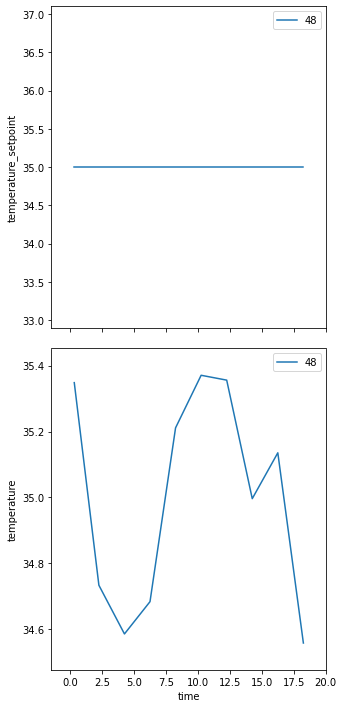

In [10]:
RE(bp.count([temperature], num=10, delay=2))

Let's reduce the update interval that EPICS uses, to the shortest interval EPICS provides, so our measurements do not take so long.

In [11]:
# print the list of possible values
print(temperature.scanning_rate.enum_strs)

# set the shortest interval, by name
temperature.scanning_rate.put(".1 second")
temperature.scanning_rate.get(as_string=True)

('Passive', 'Event', 'I/O Intr', '10 second', '5 second', '2 second', '1 second', '.5 second', '.2 second', '.1 second')


'2 second'

## Collect our measurements
Repeat the measurement, this time with more observations.

Also, we'll add a metadata key:value pair so that later we can find this data more easily in the database.  Most plans take a `md={}` kwarg where the value is a Python dictionary with the key:value pair(s) to add to the run's metadata.



Transient Scan ID: 49     Time: 2021-04-13 11:38:17
Persistent Unique Scan ID: '798369e3-0f42-4666-8823-2485e1407e65'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+-------------+
|   seq_num |       time | temperature_setpoint | temperature |
+-----------+------------+----------------------+-------------+
|         1 | 11:38:17.9 |             35.00000 |    34.78574 |
|         2 | 11:38:18.0 |             35.00000 |    34.86652 |
|         3 | 11:38:18.1 |             35.00000 |    34.56160 |
|         4 | 11:38:18.2 |             35.00000 |    35.23048 |
|         5 | 11:38:18.3 |             35.00000 |    34.50099 |
|         6 | 11:38:18.4 |             35.00000 |    35.21287 |
|         7 | 11:38:18.5 |             35.00000 |    34.50694 |
|         8 | 11:38:18.6 |             35.00000 |    35.33565 |
|         9 | 11:38:18.7 |             35.00000 |    34.71675 |
|        10 | 11:38:18.8 |             35.00000 |    34.97184 |
|  

('798369e3-0f42-4666-8823-2485e1407e65',)

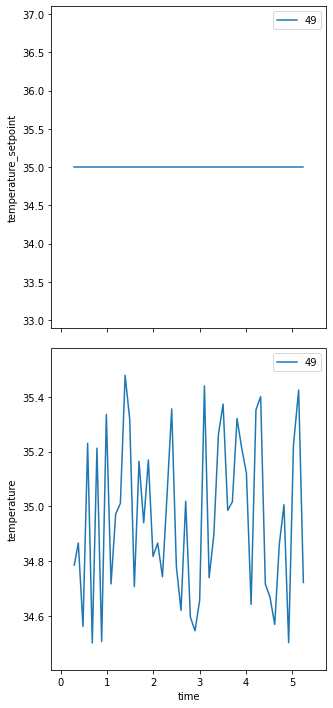

In [12]:
RE(bp.count([temperature], num=50, delay=0.1, md={"motive": "tscan"}))

## Get the data (from the database)
Let's get the measured data from the database now.  It's the most recent bluesky run, so an index of `-1` will identify it.

In [13]:
dataset = db.v2[-1].primary.read()

Let's get the values as a 1-D numpy array.

In [14]:
T = dataset["temperature"].values

## Compute the statistics
Use the methods of numpy arrays to compute maximum, mean, standard deviation, and minimum.  Looks nicer in a table.

In [15]:
table = pyRestTable.Table()
table.addLabel("measure")
table.addLabel("value")
table.addRow(("max", T.max()))
table.addRow(("mean", T.mean()))
table.addRow(("dev", T.std()))
table.addRow(("min", T.min()))
table.addRow(("#", len(T)))
print(table)

======= ===================
measure value              
======= ===================
max     35.478896772716865 
mean    34.95966277561608  
dev     0.29564720403532396
min     34.50099183642328  
#       50                 
======= ===================



Let's replot that data for comparison.

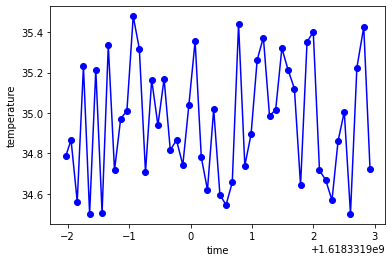

In [16]:
dataset["temperature"].plot(marker="o", color="blue")

## Challenges

Try these additional modifications or activities.

1. Scan using the temperature as a positioner (`bp.scan()`)
2. Record temperature values as an additional data stream during a scan.